## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
!pip install tensorflow-gpu

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# # splitting the dataset int train , test and split sets

# import os
# import numpy as np
# import shutil

# data_path="/content/drive/MyDrive/segmented" 
# splitted_data="/content/drive/MyDrive/imagedataset"
# train_ratio=0.6
# valid_ratio=0.2
# test_ratio=0.2

# classes = os.listdir(data_path)
# print(classes)
# for i in classes:
#   os.makedirs(splitted_data +'/train/' + i)
#   os.makedirs(splitted_data +'/valid/' + i)
#   os.makedirs(splitted_data +'/test/' + i)
#   source = data_path+'/'+i
#   image_list_per_class = os.listdir(source)
#   np.random.shuffle(image_list_per_class)
#   train_images, valid_images, test_images = np.split(np.array(image_list_per_class), 
#                                                     [int(len(image_list_per_class)*train_ratio),int(len(image_list_per_class)*(train_ratio+valid_ratio))])
#   train_FileNames = [source+'/'+ name for name in train_images.tolist()]
#   valid_FileNames = [source+'/'+ name for name in valid_images.tolist()]
#   test_FileNames = [source+'/' + name for name in test_images.tolist()]
#   for name in train_FileNames:
#     shutil.copy(name, splitted_data +'/train/' + i)
#   for name in valid_FileNames:
#     shutil.copy(name, splitted_data +'/valid/' + i)
#   for name in test_FileNames:
#     shutil.copy(name, splitted_data +'/test/' + i)


In [7]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/imagedataset/train'
valid_path = '/content/drive/MyDrive/imagedataset/valid'
test_path = '/content/drive/MyDrive/imagedataset/test'

In [8]:
# Importing the Inception V3 library and adding preprocessing layer to the front
# Using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# Not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# getting number of output classes
folders = glob('/content/drive/MyDrive/imagedataset/train/*')

In [11]:
# our layer
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
# creating the model object
model = Model(inputs=inception.input, outputs=prediction)

In [14]:
# structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
# model's cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Adding data-augmentation parameters to ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7094 images belonging to 38 classes.


In [18]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2364 images belonging to 38 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2370 images belonging to 38 classes.


In [27]:
# fitting the model
r = model.fit(
  train_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

Epoch 1/5
222/222 [==============================] - 1041s 5s/step - loss: 0.8564 - accuracy: 0.9081 - val_loss: 0.8331 - val_accuracy: 0.9310
Epoch 2/5
222/222 [==============================] - 993s 4s/step - loss: 0.8246 - accuracy: 0.9275 - val_loss: 1.1737 - val_accuracy: 0.9040
Epoch 3/5
222/222 [==============================] - 963s 4s/step - loss: 0.7341 - accuracy: 0.9360 - val_loss: 1.0069 - val_accuracy: 0.9188
Epoch 4/5
222/222 [==============================] - 951s 4s/step - loss: 0.8159 - accuracy: 0.9367 - val_loss: 0.8783 - val_accuracy: 0.9471
Epoch 5/5
222/222 [==============================] - 942s 4s/step - loss: 0.6376 - accuracy: 0.9525 - val_loss: 1.4541 - val_accuracy: 0.9124


In [28]:
 import matplotlib.pyplot as plt

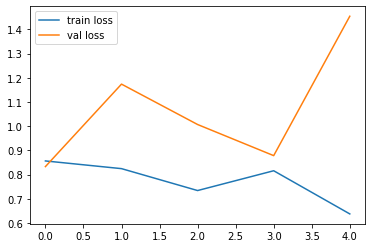

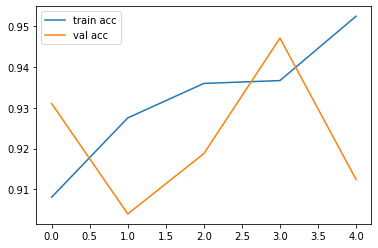

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
valid_loss, valid_acc = model.evaluate(valid_set, steps=len(valid_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

74/74 [==============================] - 227s 3s/step - loss: 1.4541 - accuracy: 0.9124
Final validation accuracy: 91.24%


In [31]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f"Final test accuracy: {test_acc*100:.2f}%")

75/75 [==============================] - 231s 3s/step - loss: 1.3252 - accuracy: 0.9198
Final test accuracy: 91.98%


In [ ]:
y_pred = model.predict(test_set)